In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

## Date Preparation and Exploration: 

#### 1.Reading a Titanic dataset from a CSV file

In [2]:
Titanic_df=pd.read_csv("Titanic data.csv")
Titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 2. Detecting missing values 

In [3]:
Titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
print("missing value for Age={0}, percentage={1}".format(Titanic_df['Age'].isnull().sum(),(Titanic_df['Age'].isnull().sum()/Titanic_df.shape[0])*100))
print("missing value for Cabin={0}, percentage={1}".format(Titanic_df['Cabin'].isnull().sum(),(Titanic_df['Cabin'].isnull().sum()/Titanic_df.shape[0])*100))
print("missing value for Embarked={0}, percentage={1}".format(Titanic_df['Embarked'].isnull().sum(),(Titanic_df['Embarked'].isnull().sum()/Titanic_df.shape[0])*100))


missing value for Age=177, percentage=19.865319865319865
missing value for Cabin=687, percentage=77.10437710437711
missing value for Embarked=2, percentage=0.22446689113355783


#### 3.Imputing missing values 

In [5]:
#Cabin has around 77% missing values so will drop this column.
Titanic_df.drop('Cabin',axis=1,inplace=True)
Titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [6]:
# get the count of each category for Embarked
Titanic_df_gb=Titanic_df.groupby(['Embarked']).count()

In [7]:
Titanic_df_gb.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
Embarked,,,,,,,,,,
C,168,168,168,168,168,130,168,168,168,168
Q,77,77,77,77,77,28,77,77,77,77
S,644,644,644,644,644,554,644,644,644,644


In [8]:
#in Embarked most likely value is S for missing values. replace missing values with S
Titanic_df['Embarked'].fillna('S',inplace=True)

In [9]:
# We will use KNNImputer to replace missingb  values for age
Titanic_age=pd.DataFrame(Titanic_df['Age'])
imputer = KNNImputer(n_neighbors=5)
Titanic_age=imputer.fit_transform(Titanic_age)

In [10]:
#join the data frame
Titanic_df['Age_New']=pd.DataFrame(np.round(Titanic_age))
Titanic_df.drop('Age',axis=1,inplace=True)
Titanic_df.head(20)


,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age_New
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S,35.0
5,6,0,3,"Moran, Mr. James",male,0,0,330877,8.4583,Q,30.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,0,0,17463,51.8625,S,54.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,3,1,349909,21.0750,S,2.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,0,2,347742,11.1333,S,27.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,1,0,237736,30.0708,C,14.0


#### 4.Exploring and visualizing data 

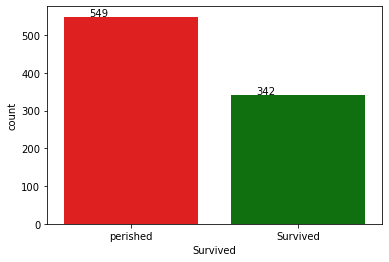

In [11]:
# a) Bar Plot which shows how many passengers survived and how many perished
ax=sns.countplot(x=Titanic_df['Survived'],palette=['r','g'])
ax.set_xticklabels(["perished","Survived"])
for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x()+0.15, p.get_height()+1))

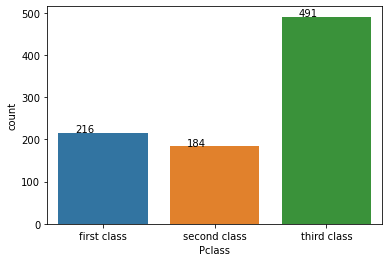

In [12]:
# b)Bar Plot which shows how many passesngers travelled by first class, second class and thrid class
ax=sns.countplot(x=Titanic_df['Pclass'])
ax.set_xticklabels(["first class","second class","third class"]) 
for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x()+0.15, p.get_height()+1))


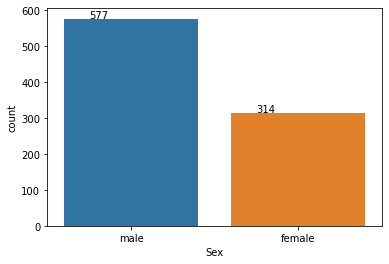

In [13]:
# c) Barplot which shows how many are male passengers and how many are female passengers
ax=sns.countplot(x=Titanic_df['Sex'])
for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x()+0.15, p.get_height()+1))

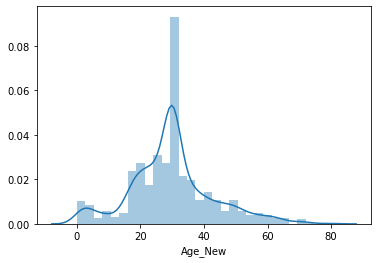

In [14]:
# d) plot histogram of different ages
sns.distplot(Titanic_df['Age_New'])

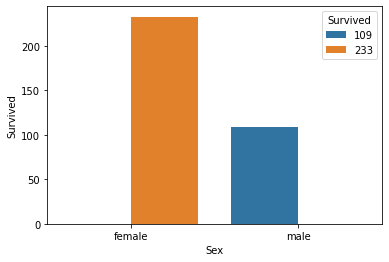

In [15]:
#e) Stacked barplot's  to find out 
# -which gender is more likely to perish during shipwrecks
Titanic_gen_gb=Titanic_df[['Sex','Survived']].groupby('Sex').sum().reset_index()
sns.barplot(x='Sex',y='Survived',data=Titanic_gen_gb,hue='Survived')

[Text(0, 0, 'first class'),
 Text(0, 0, 'second class'),
 Text(0, 0, 'third class')]

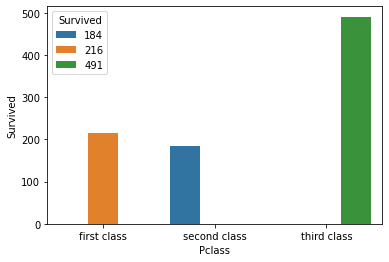

In [16]:
# -Passenger survival by class
Titanic_class_gb=Titanic_df[['Pclass','Survived']].groupby('Pclass').count().reset_index()
ax=sns.barplot(x='Pclass',y='Survived',data=Titanic_class_gb,hue='Survived')
ax.set_xticklabels(["first class","second class","third class"]) 

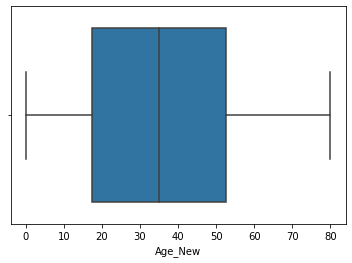

In [17]:
#f) Box Plot which shows passenger survival by age
Titanic_Age_gb=Titanic_df[['Age_New','Survived']].groupby('Age_New').count().reset_index()
ax = sns.boxplot(x='Age_New',hue="Survived",data=Titanic_Age_gb,orient="h")


### Visualization

#### 5. Read from sample superstore xl file  into pandas dataframe and perform below operations 

In [18]:
sample_df=pd.read_excel("sample_-_superstore_2.xls")
sample_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [19]:
#a) Display Subcategory wise sum of profit
sample_sub_cat=sample_df.groupby('Sub-Category').sum()
sample_sub_cat['Profit'].head()

Sub-Category
Accessories    41936.6357
Appliances     18138.0054
Art             6527.7870
Binders        30221.7633
Bookcases      -3472.5560
Name: Profit, dtype: float64

In [20]:
#b) Exclude Office Furniture SubCategory
sample_df=sample_df[sample_df['Sub-Category']!='Office Furniture']

In [21]:
#c) Sort SubCategory in Desc order
sample_df.sort_values(by='Sub-Category',ascending=False)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
4683,4684,CA-2016-159912,2016-08-29,2016-09-03,Standard Class,GB-14530,George Bell,Corporate,United States,Philadelphia,...,19120,East,FUR-TA-10004152,Furniture,Tables,"Barricks 18"" x 48"" Non-Folding Utility Table w...",241.920,4,0.4,-56.4480
8783,8784,CA-2016-116911,2016-09-15,2016-09-20,Standard Class,JD-16150,Justin Deggeller,Corporate,United States,Twin Falls,...,83301,West,FUR-TA-10003473,Furniture,Tables,Bretford Rectangular Conference Table Tops,1128.390,3,0.0,259.5297
4264,4265,US-2016-131611,2016-11-05,2016-11-09,Standard Class,EP-13915,Emily Phan,Consumer,United States,Houston,...,77036,Central,FUR-TA-10002774,Furniture,Tables,Laminate Occasional Tables,863.128,8,0.3,-160.2952
3496,3497,CA-2016-107328,2016-08-08,2016-08-15,Standard Class,CA-12055,Cathy Armstrong,Home Office,United States,Los Angeles,...,90036,West,FUR-TA-10001932,Furniture,Tables,"Chromcraft 48"" x 96"" Racetrack Double Pedestal...",513.024,2,0.2,12.8256
2664,2665,CA-2016-164784,2016-05-01,2016-05-04,First Class,HF-14995,Herbert Flentye,Consumer,United States,Memphis,...,38109,South,FUR-TA-10004534,Furniture,Tables,Bevis 44 x 96 Conference Tables,370.620,3,0.4,-142.0710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9317,9318,CA-2017-124940,2017-02-21,2017-02-26,Standard Class,DK-13090,Dave Kipp,Consumer,United States,Carrollton,...,75007,Central,TEC-AC-10002076,Technology,Accessories,Microsoft Natural Keyboard Elite,47.904,1,0.2,-2.9940
3899,3900,CA-2017-157980,2017-12-07,2017-12-09,First Class,SH-20395,Shahid Hopkins,Consumer,United States,Toledo,...,43615,East,TEC-AC-10002567,Technology,Accessories,Logitech G602 Wireless Gaming Mouse,127.984,2,0.2,25.5968
3901,3902,CA-2015-151043,2015-11-14,2015-11-20,Standard Class,MG-17680,Maureen Gastineau,Home Office,United States,Philadelphia,...,19143,East,TEC-AC-10001090,Technology,Accessories,Micro Innovations Wireless Classic Keyboard wi...,47.984,2,0.2,-1.1996
3932,3933,CA-2016-132094,2016-08-26,2016-09-02,Standard Class,VG-21805,Vivek Grady,Corporate,United States,Philadelphia,...,19140,East,TEC-AC-10001109,Technology,Accessories,Logitech Trackman Marble Mouse,47.984,2,0.2,13.1956


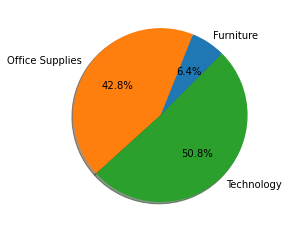

In [22]:
#d) Categorywise sum of profit in pie chart
sample_cat=sample_df.groupby('Category').sum().reset_index()
explode = (0.1, 0, 0, 0) 
plt.pie(sample_cat['Profit'],labels=sample_cat['Category'],autopct='%1.1f%%', shadow=True, startangle=45);

In [23]:
#f) Display Top 10 most profitable customers
sample_sorted_df=sample_df.sort_values(by='Profit',ascending=False)
sample_sorted_df['Customer Name'].head(10)

6826            Tamara Chand
8153            Raymond Buch
4190            Hunter Lopez
9039           Adrian Barton
4098            Sanjit Chand
2623            Tom Ashbrook
509     Christopher Martinez
8488            Sanjit Engle
7666           Daniel Raglin
6520             Andy Reiter
Name: Customer Name, dtype: object

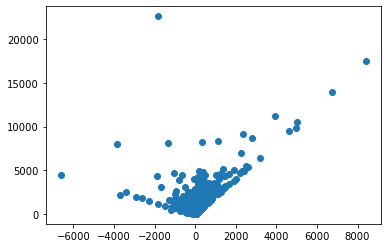

In [24]:
#g) scatter plot between profit and sales
plt.scatter(sample_df['Profit'], sample_df['Sales'], marker='o');

#### 6.Create dept dataframe and emp dataframe  with suitable data and perform inner , leftouter,RightOuter andFullOuter Joins based on common column Deptno. 

In [25]:
Dept_Data={"Deptno":[101,102,103,104,105,106,107,108,109,110],
           "Dname":["Account","Admin","Finance","Library","Staff","Security","Learning&Placement","House Keeping","Management","Student Welfare"]
,"Loc":["Bangalore","Delhi","Mumbai","Kochi","Bhopal","Noida","Kolkata","Pune","Gantok","SriNagar"]}
Dept_Data_Df=pd.DataFrame(Dept_Data)
Dept_Data_Df.head()


,Deptno,Dname,Loc
0,101,Account,Bangalore
1,102,Admin,Delhi
2,103,Finance,Mumbai
3,104,Library,Kochi
4,105,Staff,Bhopal


In [26]:
Emp_Data={"Deptno":[101,102,103,104,105,106,107,200,201,202],
           "Eno":[301,302,303,304,305,306,307,308,309,310]
,"Sal":[200000,250000,300000,400000,100000,280000,290000,230000,210000,200000]}
Emp_Data_Df=pd.DataFrame(Emp_Data)
Emp_Data_Df.head()

,Deptno,Eno,Sal
0,101,301,200000
1,102,302,250000
2,103,303,300000
3,104,304,400000
4,105,305,100000


In [27]:
inner_df=pd.merge(Dept_Data_Df,Emp_Data_Df,on="Deptno",how='inner')
inner_df.head(10)

,Deptno,Dname,Loc,Eno,Sal
0,101,Account,Bangalore,301,200000
1,102,Admin,Delhi,302,250000
2,103,Finance,Mumbai,303,300000
3,104,Library,Kochi,304,400000
4,105,Staff,Bhopal,305,100000
5,106,Security,Noida,306,280000
6,107,Learning&Placement,Kolkata,307,290000


In [28]:
left_df=pd.merge(Dept_Data_Df,Emp_Data_Df,on="Deptno",how='left')
left_df.head(10)

,Deptno,Dname,Loc,Eno,Sal
0,101,Account,Bangalore,301.0,200000.0
1,102,Admin,Delhi,302.0,250000.0
2,103,Finance,Mumbai,303.0,300000.0
3,104,Library,Kochi,304.0,400000.0
4,105,Staff,Bhopal,305.0,100000.0
5,106,Security,Noida,306.0,280000.0
6,107,Learning&Placement,Kolkata,307.0,290000.0
7,108,House Keeping,Pune,NaN,NaN
8,109,Management,Gantok,NaN,NaN
9,110,Student Welfare,SriNagar,NaN,NaN


In [29]:
full_df=pd.merge(Dept_Data_Df,Emp_Data_Df,on="Deptno",how='outer')
full_df.head(20)

,Deptno,Dname,Loc,Eno,Sal
0,101,Account,Bangalore,301.0,200000.0
1,102,Admin,Delhi,302.0,250000.0
2,103,Finance,Mumbai,303.0,300000.0
3,104,Library,Kochi,304.0,400000.0
4,105,Staff,Bhopal,305.0,100000.0
5,106,Security,Noida,306.0,280000.0
6,107,Learning&Placement,Kolkata,307.0,290000.0
7,108,House Keeping,Pune,NaN,NaN
8,109,Management,Gantok,NaN,NaN
9,110,Student Welfare,SriNagar,NaN,NaN


In [30]:
right_df=pd.merge(Dept_Data_Df,Emp_Data_Df,on="Deptno",how='right')
right_df.head(10)

,Deptno,Dname,Loc,Eno,Sal
0,101,Account,Bangalore,301,200000
1,102,Admin,Delhi,302,250000
2,103,Finance,Mumbai,303,300000
3,104,Library,Kochi,304,400000
4,105,Staff,Bhopal,305,100000
5,106,Security,Noida,306,280000
6,107,Learning&Placement,Kolkata,307,290000
7,200,NaN,NaN,308,230000
8,201,NaN,NaN,309,210000
9,202,NaN,NaN,310,200000


### Descriptive and Inferential Statistics: 

##### 7.Suppose the height of men in the United Kingdom is known to be normally distributed with a mean of 177 centimeters and a standard deviation of 10 centimeters. If you were to select a man from the United Kingdom population at random, what is the probability that he would be more than 200 centimeters tall?

In [31]:
#first get the Z score.
Z="(x−mu)/sigma"
Z=(200-177)/10
Z=2.3
#valuein standard normal distribution table for z score 2.3 is 0.9893
probability=1-0.9893
probability

0.010700000000000043

#### 8.Let's take the mileage and horsepower of various cars and see if there is a relation between the two.

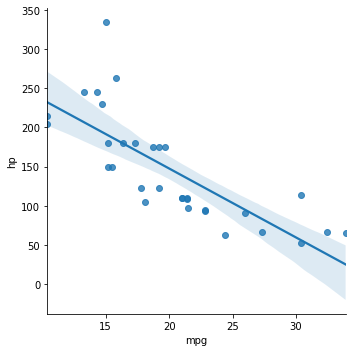

In [32]:
mpg = [21.0, 21.0, 22.8, 21.4, 18.7, 18.1, 14.3, 24.4, 22.8, 19.2, 17.8, 16.4, 17.3, 15.2, 10.4, 10.4, 14.7, 32.4, 30.4,
       33.9, 21.5, 15.5, 15.2, 13.3, 19.2, 27.3, 26.0, 30.4, 15.8, 19.7, 15.0, 21.4]
hp = [110, 110, 93, 110, 175, 105, 245, 62, 95, 123, 123, 180, 180, 180, 205, 215, 230, 66, 52, 65, 97, 150, 150, 245, 175, 66, 91, 113, 264, 175, 335, 109]
cars=pd.DataFrame(mpg,columns=['mpg'])
cars['hp']=hp
sns.lmplot(x = 'mpg',y = 'hp',data=cars)




#### 9.Perform T-test on two classes that are given a mathematics test and have 10 students in each class. Determine if 2 distributions are identical or not.

In [33]:
from scipy.stats import ttest_ind
# We can use this test(T test), if we observe two independent samples from the same or different population
class1_score = np.array([45.0, 40.0, 49.0, 52.0, 54.0, 64.0, 36.0, 41.0, 42.0, 34.0])
class2_score = np.array([75.0, 85.0, 53.0, 70.0, 72.0, 93.0, 61.0, 65.0, 65.0, 72.0])
ttest_ind(class1_score, class2_score)

#pvalue is greater than 0.5 we accept null hypothesis so both are identical .

Ttest_indResult(statistic=-5.458195056848408, pvalue=3.482072285015316e-05)

#### 10. The mean score of the mathematics exam at a national level is 60 marks and the standard deviation is 3 marks.The mean marks of a class are 53. The null hypothesis is that the mean marks of the class are similar to the national average.  Test this Hypothesis using Z – Test. 

In [34]:
import math
z_score=(53-60)/(3/math.sqrt(100))
z_score
#p value is less than 0.5 so we accept The null hypothesis 

-23.333333333333336

In [35]:
#11. Calculate Pearson correlation coefficient between Girth and Volume in trees dataset( trees csv file)Pl mention what you draw from correlation coefficient 

#12.Suppose that you want to perform a hypothesis test to help determine whether the correlation between tree girth and tree volume is statistically significant.
#Correlation coefficients are used in statistics to measure how strong a relationship is between two variables
from scipy.stats import pearsonr
tree_df=pd.read_csv("Trees.csv")
tree_df.head()


,Girth,Height,Volume
0,8.3,70,10.3
1,8.6,65,10.3
2,8.8,63,10.2
3,10.5,72,16.4
4,10.7,81,18.8


In [36]:
coefficient=pearsonr(tree_df['Girth'],tree_df['Volume'])
coefficient


(0.9671193682556305, 8.644334211770575e-19)

### Machine Learning Algorithms 

#### 12. Use Automobile price data Raw csv file  
•	Split data 80% to train 20% for test
•	predict price for 20% test data
•	Determine R-Squared value


In [37]:
Automobile_df=pd.read_csv("automobile price data.csv")
Automobile_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [38]:
Automobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [39]:
# we have found some value are ? let repalce this with NaN and get info agagin
Automobile_df.replace("?",np.NaN,inplace=True)
Automobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [40]:
columns=['fuel-type','num-of-doors','body-style','drive-wheels','engine-type','num-of-cylinders','engine-size',
        'stroke','horsepower','price']
Automobile_df_new=pd.DataFrame(Automobile_df,columns=columns)
Automobile_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   fuel-type         205 non-null    object
 1   num-of-doors      203 non-null    object
 2   body-style        205 non-null    object
 3   drive-wheels      205 non-null    object
 4   engine-type       205 non-null    object
 5   num-of-cylinders  205 non-null    object
 6   engine-size       205 non-null    int64 
 7   stroke            201 non-null    object
 8   horsepower        203 non-null    object
 9   price             201 non-null    object
dtypes: int64(1), object(9)
memory usage: 16.1+ KB


In [41]:
Automobile_df_new.dropna(inplace=True)
Automobile_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 204
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   fuel-type         193 non-null    object
 1   num-of-doors      193 non-null    object
 2   body-style        193 non-null    object
 3   drive-wheels      193 non-null    object
 4   engine-type       193 non-null    object
 5   num-of-cylinders  193 non-null    object
 6   engine-size       193 non-null    int64 
 7   stroke            193 non-null    object
 8   horsepower        193 non-null    object
 9   price             193 non-null    object
dtypes: int64(1), object(9)
memory usage: 16.6+ KB


In [42]:
# feature fuel-type unique values
Automobile_df_new['fuel-type'].unique() 

array(['gas', 'diesel'], dtype=object)

In [43]:
# feature num-of-doors unique values
Automobile_df_new['num-of-doors'].unique() 


array(['two', 'four'], dtype=object)

In [44]:
# feature num-of-doors unique values
Automobile_df_new['body-style'].unique() 

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [45]:
# feature drive-wheels unique values
Automobile_df_new['drive-wheels'].unique() 

array(['rwd', 'fwd', '4wd'], dtype=object)

In [46]:
# feature engine-type unique values
Automobile_df_new['engine-type'].unique() 

array(['dohc', 'ohcv', 'ohc', 'l', 'ohcf'], dtype=object)

In [47]:
# feature num-of-cylinders unique values
Automobile_df_new['num-of-cylinders'].unique() 

array(['four', 'six', 'five', 'three', 'twelve', 'eight'], dtype=object)

In [48]:
# feature stroke unique values
Automobile_df_new['stroke'].unique() 

array(['2.68', '3.47', '3.4', '2.8', '3.19', '3.39', '3.03', '3.11',
       '3.23', '3.46', '3.9', '3.41', '3.07', '3.58', '4.17', '2.76',
       '3.15', '3.16', '3.64', '3.1', '3.35', '3.12', '3.86', '3.29',
       '3.27', '3.52', '2.19', '3.21', '2.9', '2.07', '2.36', '2.64',
       '3.08', '3.5', '3.54', '2.87'], dtype=object)

In [49]:
# feature horsepower unique values
Automobile_df_new['horsepower'].unique() 

array(['111', '154', '102', '115', '110', '140', '101', '121', '182',
       '48', '70', '68', '88', '145', '58', '76', '60', '86', '100', '78',
       '90', '176', '262', '84', '120', '72', '123', '155', '184', '175',
       '116', '69', '55', '97', '152', '160', '200', '95', '142', '143',
       '207', '73', '82', '94', '62', '56', '112', '92', '161', '156',
       '52', '85', '114', '162', '134', '106'], dtype=object)

In [50]:
# feature price unique values
Automobile_df_new['price'].unique() 

array(['13495', '16500', '13950', '17450', '15250', '17710', '18920',
       '23875', '16430', '16925', '20970', '21105', '24565', '30760',
       '41315', '36880', '5151', '6295', '6575', '5572', '6377', '7957',
       '6229', '6692', '7609', '8921', '12964', '6479', '6855', '5399',
       '6529', '7129', '7295', '7895', '9095', '8845', '10295', '12945',
       '10345', '6785', '11048', '32250', '35550', '36000', '5195',
       '6095', '6795', '6695', '7395', '8495', '10595', '10245', '11245',
       '18280', '18344', '25552', '28248', '28176', '31600', '34184',
       '35056', '40960', '45400', '16503', '5389', '6189', '6669', '7689',
       '9959', '8499', '12629', '14869', '14489', '6989', '8189', '9279',
       '5499', '7099', '6649', '6849', '7349', '7299', '7799', '7499',
       '7999', '8249', '8949', '9549', '13499', '14399', '17199', '19699',
       '18399', '11900', '13200', '12440', '13860', '15580', '16900',
       '16695', '17075', '16630', '17950', '18150', '12764', '220

In [51]:
# convert all non nummeric into numeric
Automobile_df_new['fuel-type'].replace('gas',0,inplace=True)
Automobile_df_new['fuel-type'].replace('diesel',1,inplace=True)

Automobile_df_new['num-of-doors'].replace('two',2,inplace=True)
Automobile_df_new['num-of-doors'].replace('four',4,inplace=True)

Automobile_df_new['body-style'].replace('convertible',0,inplace=True)
Automobile_df_new['body-style'].replace('hatchback',1,inplace=True)
Automobile_df_new['body-style'].replace('sedan',2,inplace=True)
Automobile_df_new['body-style'].replace('wagon',3,inplace=True)
Automobile_df_new['body-style'].replace('hardtop',4,inplace=True)

Automobile_df_new['drive-wheels'].replace('rwd',0,inplace=True)
Automobile_df_new['drive-wheels'].replace('fwd',1,inplace=True)
Automobile_df_new['drive-wheels'].replace('4wd',2,inplace=True)

Automobile_df_new['engine-type'].replace('dohc',0,inplace=True)
Automobile_df_new['engine-type'].replace('ohcv',1,inplace=True)
Automobile_df_new['engine-type'].replace('l',2,inplace=True)
Automobile_df_new['engine-type'].replace('ohcf',3,inplace=True)
Automobile_df_new['engine-type'].replace('ohc',4,inplace=True)

Automobile_df_new['num-of-cylinders'].replace('four',4,inplace=True)
Automobile_df_new['num-of-cylinders'].replace('six',6,inplace=True)
Automobile_df_new['num-of-cylinders'].replace('five',5,inplace=True)
Automobile_df_new['num-of-cylinders'].replace('twelve',12,inplace=True)
Automobile_df_new['num-of-cylinders'].replace('eight',8,inplace=True)
Automobile_df_new['num-of-cylinders'].replace('three',3,inplace=True)

Automobile_df_new['stroke']=Automobile_df_new['stroke'].astype(float)
Automobile_df_new['horsepower']=Automobile_df_new['horsepower'].astype(int)
Automobile_df_new['price']=Automobile_df_new['price'].astype(int)

In [52]:
Automobile_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 204
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fuel-type         193 non-null    int64  
 1   num-of-doors      193 non-null    int64  
 2   body-style        193 non-null    int64  
 3   drive-wheels      193 non-null    int64  
 4   engine-type       193 non-null    int64  
 5   num-of-cylinders  193 non-null    int64  
 6   engine-size       193 non-null    int64  
 7   stroke            193 non-null    float64
 8   horsepower        193 non-null    int32  
 9   price             193 non-null    int32  
dtypes: float64(1), int32(2), int64(7)
memory usage: 15.1 KB


In [53]:
#split in traning and test set
y=Automobile_df_new['price']
Automobile_df_new.drop('price',axis=1,inplace=True)
X=Automobile_df_new
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
Regresser=LinearRegression()
Regresser.fit(X_train,y_train)

LinearRegression()

In [55]:
predict_test=Regresser.predict(X_test)

In [56]:
from sklearn.metrics import r2_score
R_Squared= r2_score(y_test,predict_test)
print("R_Squared=",R_Squared)

R_Squared= 0.8142523589202896


### 13. The Pima Indians Diabetes Binary Classification dataset csv file contains all of the data of female   patients of the same age belonging to Pima Indian heritage. The data includes medical data, such 
as glucose and insulin levels, as well as lifestyle factors of the patients. The columns in the dataset are as follows: 
•	Number of times pregnant
•	Plasma glucose concentration of 2 hours in an oral glucose tolerance test
•	Diastolic blood pressure (mm Hg)
•	Triceps skin fold thickness (mm)
•	2-hour serum insulin (mu U/ml)
•	Body mass index (weight in kg/(height in m)^2)
•	Diabetes pedigree function
•	Age (years)
•	Class variable (0 or 1)
•	The last column is the target variable or class variable that takes the value 0 or 1, where 1 is positive or affected by diabetes and 0 means that the patient is not affected.
•	You have to build models that could predict whether a patient has diabetes or tests positive or not using logistic regression


In [57]:
Df=pd.read_csv("prima india.csv")
Df.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [58]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Number of times pregnant                                                  768 non-null    int64  
 1   Plasma glucose concentration a 2 hours in an oral glucose tolerance test  768 non-null    int64  
 2   Diastolic blood pressure (mm Hg)                                          768 non-null    int64  
 3   Triceps skin fold thickness (mm)                                          768 non-null    int64  
 4   2-Hour serum insulin (mu U/ml)                                            768 non-null    int64  
 5   Body mass index (weight in kg/(height in m)^2)                            768 non-null    float64
 6   Diabetes pedigree function                                         

In [59]:
y=Df['Class variable (0 or 1)']
Df.drop('Class variable (0 or 1)',axis=1,inplace=True)
X=Df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
Classifier=LogisticRegression()
Classifier.fit(X_train,y_train)

C:\Users\rinku\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [60]:
Classifier.score(X_test, y_test)

0.7467532467532467

### 14.Use hotel.csv file and Show how to cluster hotel location data with K-means Clustering. That is performK-means clustering on hotel location data to identify whether the hotels are located in the same district. 

In [61]:
hotel_df=pd.read_csv("hotel.csv")
hotel_df.head()

,address,lat,lon,title,district
0,"No.30 Youya Road, Beitou District, Taipei 1124...",25.137793,121.51495,Grand View Resort Beitou,Beitou
1,"No.28 Section 1, Minsheng East Road, Zhongshan...",25.057854,121.52409,YoMi Hotel,Zhongshan
2,"No.3 Zhongshan Road, Beitou District, Taipei 1...",25.137163,121.50544,Beitou Hot Spring Resort (Tian Yue Quan),Beitou
3,"No.18 Songgao Road, Xinyi District, Taipei 110...",25.039248,121.56741,Humble House Taipei,Xinyi
4,"4F., No.11, Sec. 2, Nanjing E. Road, Taipei 10...",25.052057,121.52831,Taipei Morning Hotel,Zhongshan


In [62]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   address   102 non-null    object 
 1   lat       102 non-null    float64
 2   lon       102 non-null    float64
 3   title     102 non-null    object 
 4   district  102 non-null    object 
dtypes: float64(2), object(3)
memory usage: 4.1+ KB


In [63]:
hotel_df.drop(['address','lat','lon'],axis=1,inplace=True)
hotel_df['text']=hotel_df['title']+" "+hotel_df['district']
hotel_df.drop(['title','district'],axis=1,inplace=True)
hotel_df.head()

,text
0,Grand View Resort Beitou Beitou
1,YoMi Hotel Zhongshan
2,Beitou Hot Spring Resort (Tian Yue Quan) Beitou
3,Humble House Taipei Xinyi
4,Taipei Morning Hotel Zhongshan


In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(hotel_df['text'])
kmeans = KMeans(n_clusters=3)
kmeans.fit(tfidf)

KMeans(n_clusters=3)

In [65]:
lines_for_predicting = ["Taipei Morning Hotel Zhongshan"]
lines_tfidf=tfidf_vectorizer.transform(lines_for_predicting)
result=kmeans.predict(lines_tfidf)
result

array([1])